### Deliverable 1: Preprocessing the Data for a Neural Network

In [135]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [136]:
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [137]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME","STATUS"],axis=1)
#application_df = application_df.drop(["EIN","NAME","USE_CASE"],axis=1)

In [138]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [139]:
# Look at APPLICATION_TYPE value counts for binning
cnt=application_df.APPLICATION_TYPE.value_counts()
cnt

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

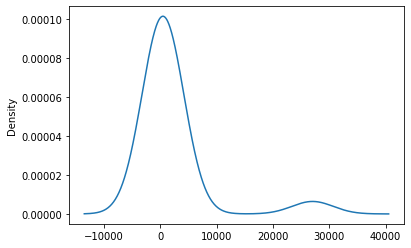

In [140]:
# Visualize the value counts of APPLICATION_TYPE
cnt.plot.density()

In [141]:
# Determine which values to replace if counts are less than ...?
replace_application = list(cnt[cnt < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [142]:
# Look at CLASSIFICATION value counts for binning
classification=application_df.CLASSIFICATION.value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:>

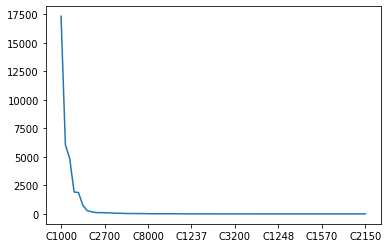

In [143]:
# Visualize the value counts of CLASSIFICATION
classification.plot()

In [144]:

# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [145]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [146]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/sm239p/.pyenv/versions/3.9.7/envs/dev/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.drop(columns = application_cat)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL
0,5000,1
1,108590,1
2,5000,0
3,6692,1
4,142590,1


In [148]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/var/folders/9y/y8gpg_3d0216xqmxr7tl6f6m0000gq/T/ipykernel_59423/3766499242.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [149]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Optimized Model

In [150]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 20

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Forth hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  ## Change Activation Types

# Check the structure of the model
nn_new.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 120)               240       
                                                                 
 dense_69 (Dense)            (None, 80)                9680      
                                                                 
 dense_70 (Dense)            (None, 40)                3240      
                                                                 
 dense_71 (Dense)            (None, 20)                820       
                                                                 
 dense_72 (Dense)            (None, 1)                 21        
                                                                 
Total params: 14,001
Trainable params: 14,001
Non-trainable params: 0
_________________________________________________________________


In [151]:
# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

In [152]:
# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=15)

Epoch 1/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5320
Epoch 2/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5325
Epoch 3/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5332
Epoch 4/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5333
Epoch 5/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5311
Epoch 6/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5337
Epoch 7/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5334
Epoch 8/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5344
Epoch 9/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5342
Epoch 10/15
804/804 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5346

In [133]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6906 - accuracy: 0.5342 - 291ms/epoch - 1ms/step
Loss: 0.6905690431594849, Accuracy: 0.5342274308204651


In [134]:
#Export the model
nn_new.save("AlphabetSoupCharity_Optimized.h5")

In [ ]:
# Tried Adding acitvations
# Tried Adding more hidden layers
# Change Activation Function
# Remove additional low variance input features